In [15]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
import time
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [30]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [31]:
# Check the shape of the data
print('Training data shape:', x_train.shape) # (50000, 32, 32, 3)
print('Training labels shape:', y_train.shape) # (50000, 1)
print('Test data shape:', x_test.shape) # (10000, 32, 32, 3)
print('Test labels shape:', y_test.shape) # (10000, 1)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [32]:
# Check the number of classes
num_classes = len(np.unique(y_train))
print('Number of classes:', num_classes) # 10

Number of classes: 10


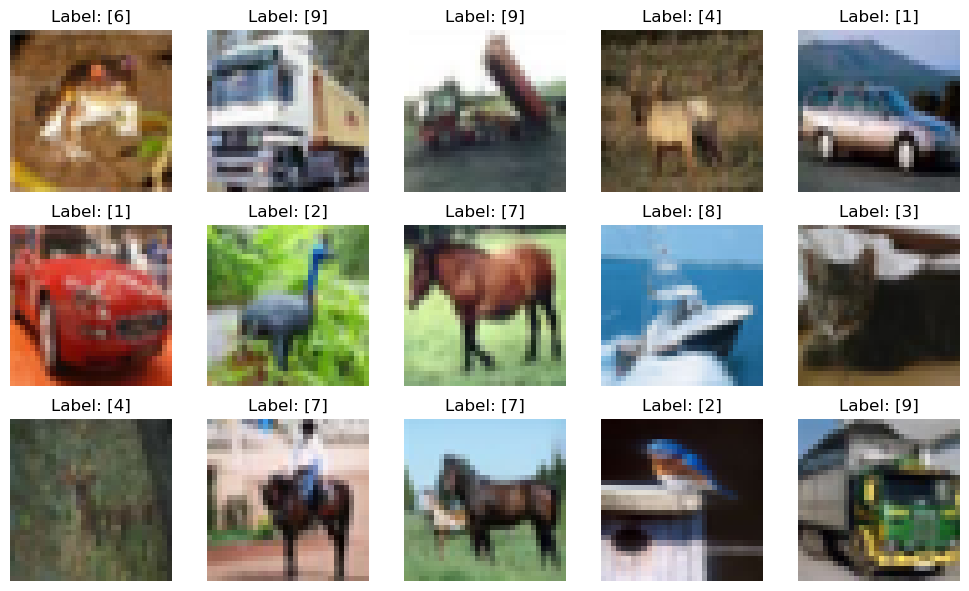

In [5]:
# Plot some sample images from the dataset
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10,6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

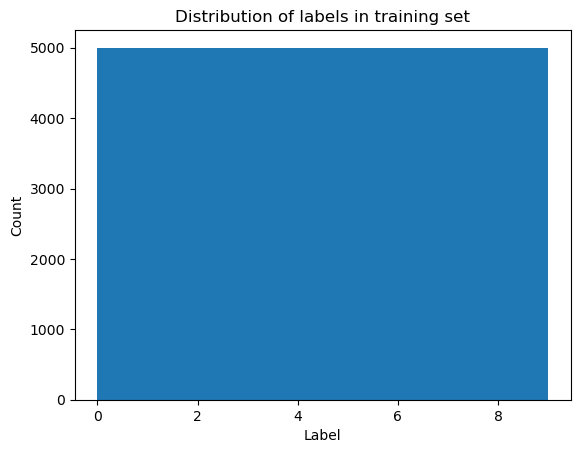

In [13]:
# Plot the distribution of labels
plt.hist(y_train, bins=num_classes)
plt.title('Distribution of labels in training set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [33]:
# Preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [15]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                      

In [17]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])


C:\Users\DELL\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:
# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

In [20]:
%%timeit -n1 -r1 # time required to execute this cell once
# Train the model
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(x_test, y_test),
                    shuffle=True,
                    callbacks=[early_stopping])

Epoch 1/50
391/391 [==============================] - 143s 362ms/step - loss: 2.0079 - accuracy: 0.2613 - val_loss: 1.7593 - val_accuracy: 0.3651
Epoch 2/50
391/391 [==============================] - 131s 336ms/step - loss: 1.7304 - accuracy: 0.3684 - val_loss: 1.5984 - val_accuracy: 0.4260
Epoch 3/50
391/391 [==============================] - 134s 342ms/step - loss: 1.6130 - accuracy: 0.4107 - val_loss: 1.5011 - val_accuracy: 0.4488
Epoch 4/50
391/391 [==============================] - 131s 334ms/step - loss: 1.5211 - accuracy: 0.4455 - val_loss: 1.4093 - val_accuracy: 0.4920
Epoch 5/50
391/391 [==============================] - 139s 355ms/step - loss: 1.4554 - accuracy: 0.4739 - val_loss: 1.3828 - val_accuracy: 0.4947
Epoch 6/50
391/391 [==============================] - 135s 345ms/step - loss: 1.4033 - accuracy: 0.4947 - val_loss: 1.3032 - val_accuracy: 0.5336
Epoch 7/50
391/391 [==============================] - 132s 337ms/step - loss: 1.3575 - accuracy: 0.5126 - val_loss: 1.2678 -

In [21]:
%%timeit -n1 -r1
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6951356530189514
Test accuracy: 0.7554000020027161
7.43 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [24]:
%%timeit -n1 -r1
# CPU benchmarking for 1 epoch
with tf.device('/CPU:0'):
    model.fit(x_train, y_train, epochs= 1)

1563/1563 [==============================] - 160s 103ms/step - loss: 0.7119 - accuracy: 0.7512
2min 43s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [27]:
# Save the trained model as an .h5 file
model.save('cifar10_model.h5')

In [28]:
from keras.models import load_model
from keras.datasets import cifar10

# Load the CIFAR-10 dataset
(_, _), (x_test, y_test) = cifar10.load_data() 

In [29]:
# Preprocess the data
x_test = x_test.astype('float32') / 255
y_test = keras.utils.to_categorical(y_test, 10)

In [30]:
# Load the trained model
model = load_model('cifar10_model.h5')

In [31]:
# Make predictions on the test data
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels to class labels
y_true_classes = np.argmax(y_test, axis=1)

313/313 [==============================] - 8s 24ms/step


In [32]:
# Print the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print('Test accuracy:', accuracy)

Test accuracy: 0.7459


In [33]:
# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7257296442985535
Test accuracy: 0.7458999752998352


In [36]:
# Print the classification report
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                'dog', 'frog', 'horse', 'ship', 'truck']
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

    airplane       0.75      0.80      0.77      1000
  automobile       0.83      0.90      0.86      1000
        bird       0.55      0.71      0.62      1000
         cat       0.62      0.48      0.54      1000
        deer       0.70      0.73      0.72      1000
         dog       0.69      0.59      0.64      1000
        frog       0.80      0.83      0.81      1000
       horse       0.84      0.73      0.79      1000
        ship       0.84      0.85      0.84      1000
       truck       0.85      0.84      0.85      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.74     10000
weighted avg       0.75      0.75      0.74     10000



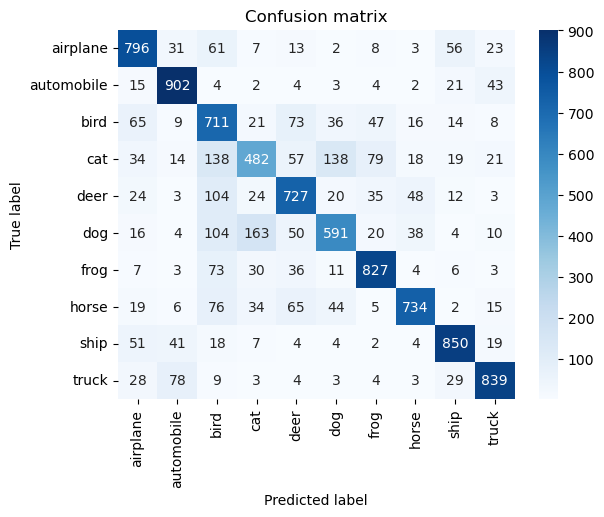

In [39]:
# Plot the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [49]:
# Convert the model to a format that can be deployed on the FPGA
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the model to a file
with open("modelCF.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\DELL\AppData\Local\Temp\tmpcjq9hybk\assets


INFO:tensorflow:Assets written to: C:\Users\DELL\AppData\Local\Temp\tmpcjq9hybk\assets


In [24]:
# Using VGG16 model, with weights pre-trained on ImageNet.
vgg16_model = VGG16(weights='imagenet',
                    include_top=False, 
                    classes=10,
                    input_shape=(32,32,3)# input: 32x32 images with 3 channels -> (32, 32, 3) tensors.
                   )

In [25]:
#Define the sequential model and add th VGG's layers to it
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [26]:
# Adding hiddens  and output layer to our model
from tensorflow.keras.layers import Dense, Flatten, Dropout
model.add(Flatten())
model.add(Dense(512, activation='relu', name='hidden1'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', name='hidden2'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax', name='predictions'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)        

In [28]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow.keras as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.utils.np_utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

In [35]:
# Convert class vectors to binary class matrices using one hot encoding
y_train_ohe = to_categorical(y_train, num_classes = 10)
y_test_ohe = to_categorical(y_test, num_classes = 10)

In [36]:
# Data normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

print(X_train.shape)
print(y_train_ohe.shape)
print(X_test.shape)
print(y_test_ohe.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [37]:
X_val = x_train[40000:]
y_val = y_train_ohe[40000:]
print(X_val.shape)
print(y_val.shape)

(10000, 32, 32, 3)
(10000, 10)


In [38]:
x_train = x_train[:40000]
y_train_ohe = y_train_ohe[:40000]
print(x_train.shape)
print(y_train_ohe.shape)

(40000, 32, 32, 3)
(40000, 10)


In [ ]:
%%timeit -n1 -r1 # time required to execute this cell once

# initiate SGD optimizer
sgd = optimizers.SGD(lr=0.001, momentum=0.9)

# For a multi-class classification problem
model.compile(loss='categorical_crossentropy',optimizer= sgd,metrics=['accuracy'])


def lr_scheduler(epoch):
    return 0.001 * (0.5 ** (epoch // 20))
reduce_lr = LearningRateScheduler(lr_scheduler)

mc = ModelCheckpoint('./weights.h5', monitor='val_accuracy', save_best_only=True, mode='max')


# initialize the number of epochs and batch size
EPOCHS = 50
BS = 128

# construct the training image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=20, 
    zoom_range=0.15, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.15,
    horizontal_flip=True, 
    fill_mode="nearest")
 
# train the model
history = model.fit_generator(
    aug.flow(X_train,y_train_ohe, batch_size=BS),
    validation_data=(X_val,y_val),
    steps_per_epoch=len(X_train) // BS,
    epochs=EPOCHS,
    callbacks=[reduce_lr,mc])

#We load the best weights saved by the ModelCheckpoint
model.load_weights('./weights.h5')

<magic-timeit>:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
  7/312 [..............................] - ETA: 51:21 - loss: 1.6842 - accuracy: 0.4007

In [ ]:
%%timeit -n1 -r1
# CPU benchmarking for 1 epoch
with tf.device('/CPU:0'):
    model.fit(X_train, Y_train, epochs= 1)

In [ ]:
%%timeit -n1 -r1 # time required to execute this cell once

train_loss, train_accuracy = model.evaluate_generator(aug.flow(X_train,y_train_ohe, batch_size=BS), 156)
print('Training loss: {}\nTraining accuracy: {}'.format(train_loss, train_accuracy))

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print('Validation loss: {}\nValidation accuracy: {}'.format(val_loss, val_accuracy))

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test,y_test_ohe,)
print('Testing loss: {}\nTesting accuracy: {}'.format(test_loss, test_accuracy))

In [ ]:
# Convert the model to a format that can be deployed on the FPGA
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the model to a file
with open("modelCF.tflite", "wb") as f:
    f.write(tflite_model)